In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots


In [4]:
df=pd.read_csv('covid_19_india.csv')

In [5]:
df.shape

(18110, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [7]:
df.head(10)

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   
5    6  2020-02-04  6:00 PM               Kerala                       3   
6    7  2020-02-05  6:00 PM               Kerala                       3   
7    8  2020-02-06  6:00 PM               Kerala                       3   
8    9  2020-02-07  6:00 PM               Kerala                       3   
9   10  2020-02-08  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
5                        0      0       0          3  
6                        0      0       0          3  
7                        0      0       0          3  
8                        0      0       0          3  
9                        0      0       0          3

In [8]:
df.tail(10)

Sno        Date     Time State/UnionTerritory  \
18100  18101  2021-08-11  8:00 AM           Puducherry   
18101  18102  2021-08-11  8:00 AM               Punjab   
18102  18103  2021-08-11  8:00 AM            Rajasthan   
18103  18104  2021-08-11  8:00 AM               Sikkim   
18104  18105  2021-08-11  8:00 AM           Tamil Nadu   
18105  18106  2021-08-11  8:00 AM            Telangana   
18106  18107  2021-08-11  8:00 AM              Tripura   
18107  18108  2021-08-11  8:00 AM          Uttarakhand   
18108  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18109  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
18100                       -                        -   119115    1800   
18101                       -                        -   582791   16322   
18102                       -                        -   944700    8954   
18103                       -                        -    25095     356   
18104                       -                        -  2524400   34367   
18105                       -                        -   638410    3831   
18106                       -                        -    77811     773   
18107                       -                        -   334650    7368   
18108                       -                        -  1685492   22775   
18109                       -                        -  1506532   18252   

       Confirmed  
18100     121766  
18101     599573  
18102     953851  
18103      28018  
18104    2579130  
18105     650353  
18106      80660  
18107     342462  
18108    1708812  
18109    1534999

In [9]:
df.describe(include=object)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Date     Time State/UnionTerritory ConfirmedIndianNational  \
count        18110    18110                18110                   18110   
unique         560        7                   46                      62   
top     2020-06-11  8:00 AM               Kerala                       -   
freq            37    16472                  560                   17664   

       ConfirmedForeignNational  
count                     18110  
unique                       12  
top                           -  
freq                      17664

In [10]:
df.describe()  # for int values only

Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.148909e+05   10919.076411  6.561489e+05
min        1.000000  0.000000e+00       0.000000  0.000000e+00
25%     4528.250000  3.360250e+03      32.000000  4.376750e+03
50%     9055.500000  3.336400e+04     588.000000  3.977350e+04
75%    13582.750000  2.788698e+05    3643.750000  3.001498e+05
max    18110.000000  6.159676e+06  134201.000000  6.363442e+06

In [11]:
vac_df=pd.read_csv('covid_vaccine_statewise.csv')

In [12]:
vac_df.head(10)

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   
5  21/01/2021  India                  365965.0   32226.0  12600.0   
6  22/01/2021  India                  549381.0   36988.0  14115.0   
7  23/01/2021  India                  759008.0   43076.0  15605.0   
8  24/01/2021  India                  835058.0   49851.0  18111.0   
9  25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN 

In [13]:
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [14]:
df.head(10)

Date State/UnionTerritory  Cured  Deaths  Confirmed
0  2020-01-30               Kerala      0       0          1
1  2020-01-31               Kerala      0       0          1
2  2020-02-01               Kerala      0       0          2
3  2020-02-02               Kerala      0       0          3
4  2020-02-03               Kerala      0       0          3
5  2020-02-04               Kerala      0       0          3
6  2020-02-05               Kerala      0       0          3
7  2020-02-06               Kerala      0       0          3
8  2020-02-07               Kerala      0       0          3
9  2020-02-08               Kerala      0       0          3

In [15]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [17]:
df.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0 2020-01-30               Kerala      0       0          1
1 2020-01-31               Kerala      0       0          1
2 2020-02-01               Kerala      0       0          2
3 2020-02-02               Kerala      0       0          3
4 2020-02-03               Kerala      0       0          3

In [18]:
#active cases
df['Active_Cases']=df['Confirmed']-(df['Cured'] + df['Deaths'])

In [19]:
df.tail()

Date State/UnionTerritory    Cured  Deaths  Confirmed  \
18105 2021-08-11            Telangana   638410    3831     650353   
18106 2021-08-11              Tripura    77811     773      80660   
18107 2021-08-11          Uttarakhand   334650    7368     342462   
18108 2021-08-11        Uttar Pradesh  1685492   22775    1708812   
18109 2021-08-11          West Bengal  1506532   18252    1534999   

       Active_Cases  
18105          8112  
18106          2076  
18107           444  
18108           545  
18109         10215

In [20]:
statewise=pd.pivot_table(df,values=['Confirmed','Deaths','Cured'],
                         index='State/UnionTerritory',aggfunc=max)

In [21]:
statewise

Confirmed    Cured  Deaths
State/UnionTerritory                                                
Andaman and Nicobar Islands                    7548     7412     129
Andhra Pradesh                              1985182  1952736   13564
Arunachal Pradesh                             50605    47821     248
Assam                                        576149   559684    5420
Bihar                                        725279   715352    9646
Bihar****                                    715730   701234    9452
Cases being reassigned to states               9265        0       0
Chandigarh                                    61992    61150     811
Chhattisgarh                                1003356   988189   13544
Dadra and Nagar Haveli                        10377    10261       4
Dadra and Nagar Haveli and Daman and Diu      10654    10646       4
Daman & Diu                                       2        0       0
Delhi                                       1436852  1411280   25068
Goa                                          172085   167978    3164
Gujarat                                      825085   814802   10077
Haryana                                      770114   759790    9652
Himachal Pradesh                             208616   202761    3537
Himanchal Pradesh                            204516   200040    3507
Jammu and Kashmir                            322771   317081    4392
Jharkhand                                    347440   342102    5130
Karanataka                                  2885238  2821491   36197
Karnataka                                   2921049  2861499   36848
Kerala                                      3586693  3396184   18004
Ladakh                                        20411    20130     207
Lakshadweep                                   10263    10165      51
Madhya Pradesh                               791980   781330   10514
Madhya Pradesh***                            791656   780735   10506
Maharashtra                                 6363442  6159676  134201
Maharashtra***                              6229596  6000911  130753
Manipur                                      105424    96776    1664
Meghalaya                                     69769    64157    1185
Mizoram                                       46320    33722     171
Nagaland                                      28811    26852     585
Odisha                                       988997   972710    6565
Puducherry                                   121766   119115    1800
Punjab                                       599573   582791   16322
Rajasthan                                    953851   944700    8954
Sikkim                                        28018    25095     356
Tamil Nadu                                  2579130  2524400   34367
Telangana                                    650353   638410    3831
Telengana                                    443360   362160    2312
Tripura                                       80660    77811     773
Unassigned                                       77        0       0
Uttar Pradesh                               1708812  1685492   22775
Uttarakhand                                  342462   334650    7368
West Bengal                                 1534999  1506532   18252

In [24]:
statewise['Recovery Rate']=statewise['Cured']*100/statewise['Confirmed']
statewise['Mortality Rtae']=statewise['Deaths']*100/statewise['Confirmed']
statewise=statewise.sort_values(by='Confirmed',ascending=False)
statewise

Confirmed    Cured  Deaths  \
State/UnionTerritory                                                   
Maharashtra                                 6363442  6159676  134201   
Maharashtra***                              6229596  6000911  130753   
Kerala                                      3586693  3396184   18004   
Karnataka                                   2921049  2861499   36848   
Karanataka                                  2885238  2821491   36197   
Tamil Nadu                                  2579130  2524400   34367   
Andhra Pradesh                              1985182  1952736   13564   
Uttar Pradesh                               1708812  1685492   22775   
West Bengal                                 1534999  1506532   18252   
Delhi                                       1436852  1411280   25068   
Chhattisgarh                                1003356   988189   13544   
Odisha                                       988997   972710    6565   
Rajasthan                                    953851   944700    8954   
Gujarat                                      825085   814802   10077   
Madhya Pradesh                               791980   781330   10514   
Madhya Pradesh***                            791656   780735   10506   
Haryana                                      770114   759790    9652   
Bihar                                        725279   715352    9646   
Bihar****                                    715730   701234    9452   
Telangana                                    650353   638410    3831   
Punjab                                       599573   582791   16322   
Assam                                        576149   559684    5420   
Telengana                                    443360   362160    2312   
Jharkhand                                    347440   342102    5130   
Uttarakhand                                  342462   334650    7368   
Jammu and Kashmir                            322771   317081    4392   
Himachal Pradesh                             208616   202761    3537   
Himanchal Pradesh                            204516   200040    3507   
Goa                                          172085   167978    3164   
Puducherry                                   121766   119115    1800   
Manipur                                      105424    96776    1664   
Tripura                                       80660    77811     773   
Meghalaya                                     69769    64157    1185   
Chandigarh                                    61992    61150     811   
Arunachal Pradesh                             50605    47821     248   
Mizoram                                       46320    33722     171   
Nagaland                                      28811    26852     585   
Sikkim                                        28018    25095     356   
Ladakh                                        20411    20130     207   
Dadra and Nagar Haveli and Daman and Diu      10654    10646       4   
Dadra and Nagar Haveli                        10377    10261       4   
Lakshadweep                                   10263    10165      51   
Cases being reassigned to states               9265        0       0   
Andaman and Nicobar Islands                    7548     7412     129   
Unassigned                                       77        0       0   
Daman & Diu                                       2        0       0   

                                          Recovery Rate  Mortality Rtae  
State/UnionTerritory                                                     
Maharashtra                                   96.797865        2.108937  
Maharashtra***                                96.329056        2.098900  
Kerala                                        94.688450        0.501967  
Karnataka                                     97.961349        1.261465  
Karanataka                                    97.790581        1.254559  
Tamil Nadu                                    97.877967        1.33

In [25]:
statewise.style.background_gradient(cmap='Reds')

In [26]:
#Top 10 active cases state
top_10_active_state=df.groupby(['State/UnionTerritory']).max()[['Active_Cases','Date']].sort_values(by='Active_Cases',ascending=False).reset_index()

In [27]:
top_10_active_state

State/UnionTerritory  Active_Cases       Date
0                                Maharashtra        701614 2021-08-11
1                                  Karnataka        605515 2021-08-11
2                                     Kerala        445692 2021-08-11
3                                 Tamil Nadu        313048 2021-08-11
4                              Uttar Pradesh        310783 2021-08-11
5                                  Rajasthan        212753 2021-08-11
6                             Andhra Pradesh        211554 2021-08-11
7                                    Gujarat        148297 2021-08-11
8                                West Bengal        132181 2021-08-11
9                               Chhattisgarh        131245 2021-08-11
10                                   Haryana        116867 2021-08-11
11                                     Bihar        115152 2021-08-11
12                            Madhya Pradesh        111366 2021-08-11
13                                    Odisha        106493 2021-08-11
14                                     Delhi        103424 2021-08-11
15                            Maharashtra***         97932 2021-07-21
16                                 Telangana         80695 2021-08-11
17                               Uttarakhand         80000 2021-08-11
18                                    Punjab         79963 2021-08-11
19                                 Telengana         78888 2021-05-01
20                                 Jharkhand         61195 2021-08-11
21                                     Assam         56295 2021-08-11
22                         Jammu and Kashmir         52848 2021-08-11
23                          Himachal Pradesh         40008 2021-08-11
24                                       Goa         32953 2021-08-11
25                                Karanataka         27550 2021-07-20
26                                Puducherry         18277 2021-08-11
27                                   Mizoram         13101 2021-08-11
28                                   Manipur         10922 2021-08-11
29          Cases being reassigned to states          9265 2020-07-18
30                                Chandigarh          8653 2021-08-11
31                                   Tripura          8302 2021-08-11
32                                 Meghalaya          8255 2021-08-11
33                                  Nagaland          5049 2021-08-11
34                                 Bihar****          5044 2021-06-11
35                         Arunachal Pradesh          4465 2021-08-11
36                                    Sikkim          4306 2021-08-11
37                               Lakshadweep          2320 2021-08-11
38  Dadra and Nagar Haveli and Daman and Diu          2081 2021-08-11
39                                    Ladakh          2041 2021-08-11
40               Andaman and Nicobar Islands          1154 2021-08-11
41                         Himanchal Pradesh           969 2021-07-20
42                         Madhya Pradesh***           415 2021-07-13
43                    Dadra and Nagar Haveli           250 2021-06-05
44                                Unassigned            77 2020-04-03
45                               Daman & Diu             2 2020-06-11

Text(0, 0.5, 'Active Cases')

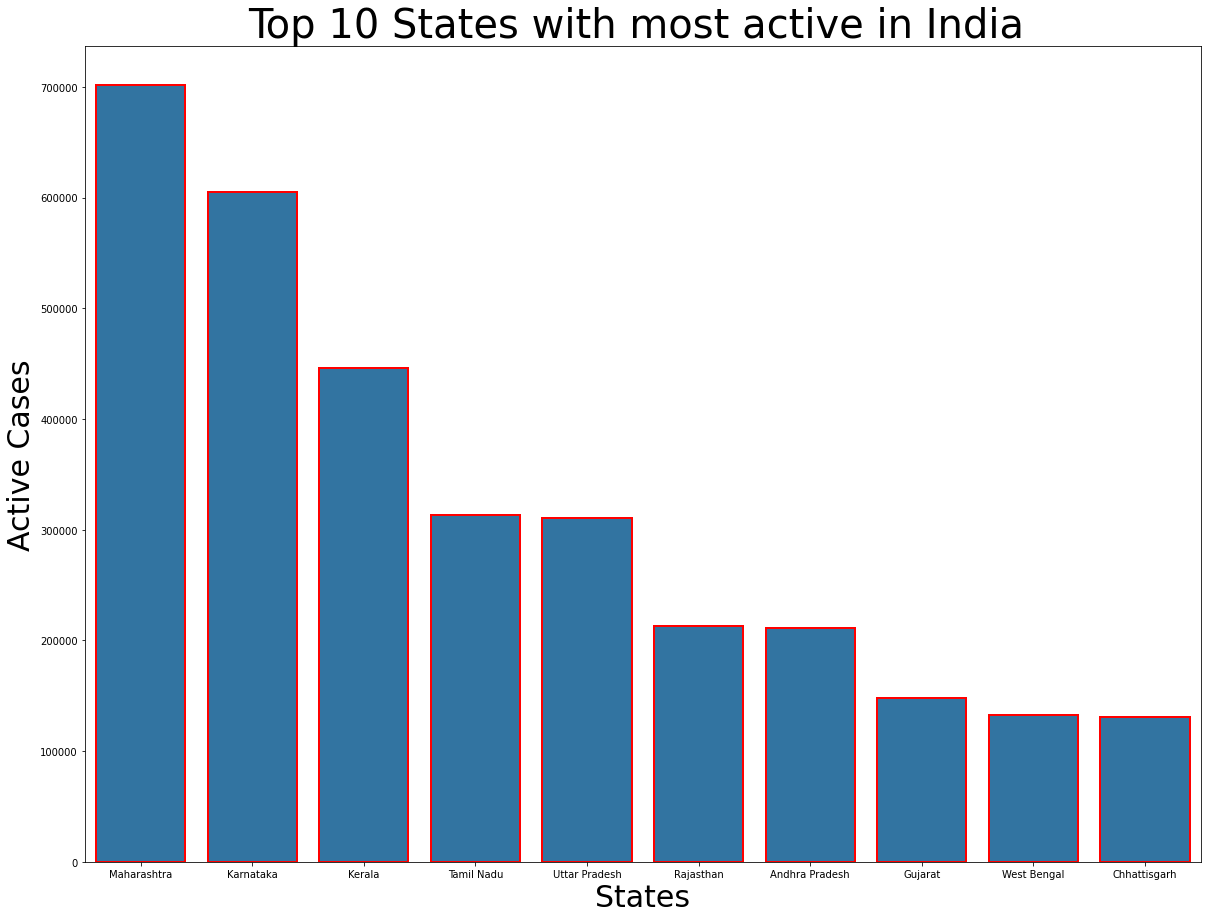

In [28]:
fig=plt.figure(figsize=(20,15))
plt.title('Top 10 States with most active in India ',fontsize=40)
ax=sns.barplot(data=top_10_active_state.iloc[:10],y='Active_Cases',x='State/UnionTerritory',linewidth=2,edgecolor='red')
plt.xlabel('States',fontsize=30)
plt.ylabel('Active Cases',fontsize=30)

In [29]:
# Top states with highest deaths
top_10_deaths=df.groupby(['State/UnionTerritory']).max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
top_10_deaths

State/UnionTerritory  Deaths       Date
0                                Maharashtra  134201 2021-08-11
1                             Maharashtra***  130753 2021-07-21
2                                  Karnataka   36848 2021-08-11
3                                 Karanataka   36197 2021-07-20
4                                 Tamil Nadu   34367 2021-08-11
5                                      Delhi   25068 2021-08-11
6                              Uttar Pradesh   22775 2021-08-11
7                                West Bengal   18252 2021-08-11
8                                     Kerala   18004 2021-08-11
9                                     Punjab   16322 2021-08-11
10                            Andhra Pradesh   13564 2021-08-11
11                              Chhattisgarh   13544 2021-08-11
12                            Madhya Pradesh   10514 2021-08-11
13                         Madhya Pradesh***   10506 2021-07-13
14                                   Gujarat   10077 2021-08-11
15                                   Haryana    9652 2021-08-11
16                                     Bihar    9646 2021-08-11
17                                 Bihar****    9452 2021-06-11
18                                 Rajasthan    8954 2021-08-11
19                               Uttarakhand    7368 2021-08-11
20                                    Odisha    6565 2021-08-11
21                                     Assam    5420 2021-08-11
22                                 Jharkhand    5130 2021-08-11
23                         Jammu and Kashmir    4392 2021-08-11
24                                 Telangana    3831 2021-08-11
25                          Himachal Pradesh    3537 2021-08-11
26                         Himanchal Pradesh    3507 2021-07-20
27                                       Goa    3164 2021-08-11
28                                 Telengana    2312 2021-05-01
29                                Puducherry    1800 2021-08-11
30                                   Manipur    1664 2021-08-11
31                                 Meghalaya    1185 2021-08-11
32                                Chandigarh     811 2021-08-11
33                                   Tripura     773 2021-08-11
34                                  Nagaland     585 2021-08-11
35                                    Sikkim     356 2021-08-11
36                         Arunachal Pradesh     248 2021-08-11
37                                    Ladakh     207 2021-08-11
38                                   Mizoram     171 2021-08-11
39               Andaman and Nicobar Islands     129 2021-08-11
40                               Lakshadweep      51 2021-08-11
41  Dadra and Nagar Haveli and Daman and Diu       4 2021-08-11
42                    Dadra and Nagar Haveli       4 2021-06-05
43                               Daman & Diu       0 2020-06-11
44                                Unassigned       0 2020-04-03
45          Cases being reassigned to states       0 2020-07-18

Text(0, 0.5, 'Deaths')

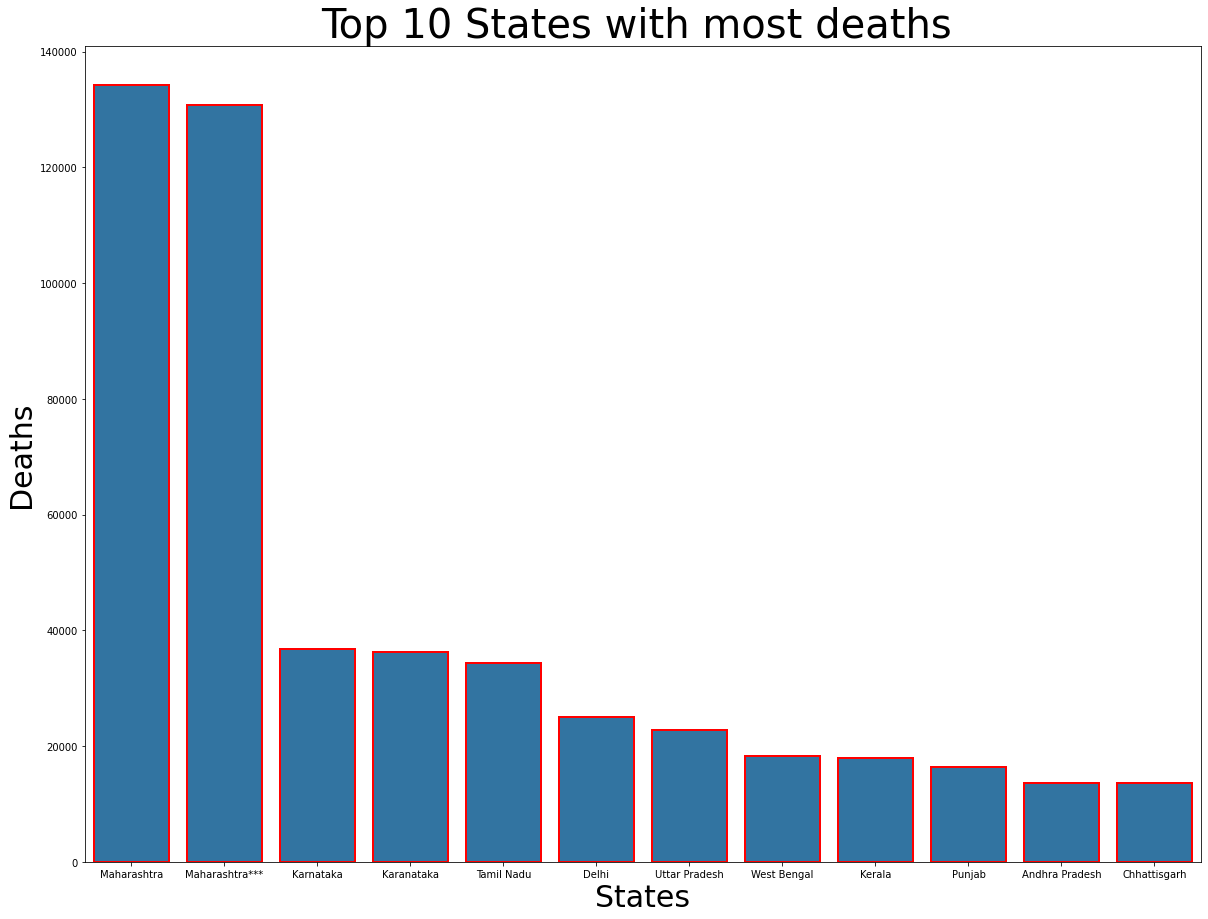

In [30]:
fig=plt.figure(figsize=(20,15))
plt.title('Top 10 States with most deaths ',fontsize=40)
ax=sns.barplot(data=top_10_deaths.iloc[:12],y='Deaths',x='State/UnionTerritory',linewidth=2,edgecolor='red')
plt.xlabel('States',fontsize=30)
plt.ylabel('Deaths',fontsize=30)

# as there are maharashtra and karnataka twice b'coz of spelling mistake so we are taking 12 columns.

Text(0.5, 1.0, 'Top 5 Affected states in India')

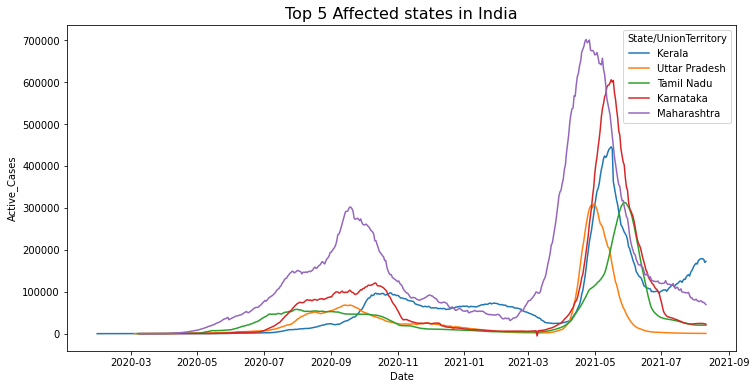

In [31]:
# Growth trend
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active_Cases',hue='State/UnionTerritory')
ax.set_title('Top 5 Affected states in India',size=16)

In [32]:
vac_df.head(10)

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   
5  21/01/2021  India                  365965.0   32226.0  12600.0   
6  22/01/2021  India                  549381.0   36988.0  14115.0   
7  23/01/2021  India                  759008.0   43076.0  15605.0   
8  24/01/2021  India                  835058.0   49851.0  18111.0   
9  25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN 

In [34]:
vac_df.rename(columns={'Updated On': 'Vaccine_Date'},inplace=True)

In [35]:
vac_df.head(10)

Vaccine_Date  State  Total Doses Administered  Sessions   Sites   \
0   16/01/2021  India                   48276.0    3455.0   2957.0   
1   17/01/2021  India                   58604.0    8532.0   4954.0   
2   18/01/2021  India                   99449.0   13611.0   6583.0   
3   19/01/2021  India                  195525.0   17855.0   7951.0   
4   20/01/2021  India                  251280.0   25472.0  10504.0   
5   21/01/2021  India                  365965.0   32226.0  12600.0   
6   22/01/2021  India                  549381.0   36988.0  14115.0   
7   23/01/2021  India                  759008.0   43076.0  15605.0   
8   24/01/2021  India                  835058.0   49851.0  18111.0   
9   25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                          

In [36]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [37]:
vac_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [39]:
vaccination=vac_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [40]:
vaccination.head(10)

Vaccine_Date  State  Total Doses Administered  Sessions   Sites   \
0   16/01/2021  India                   48276.0    3455.0   2957.0   
1   17/01/2021  India                   58604.0    8532.0   4954.0   
2   18/01/2021  India                   99449.0   13611.0   6583.0   
3   19/01/2021  India                  195525.0   17855.0   7951.0   
4   20/01/2021  India                  251280.0   25472.0  10504.0   
5   21/01/2021  India                  365965.0   32226.0  12600.0   
6   22/01/2021  India                  549381.0   36988.0  14115.0   
7   23/01/2021  India                  759008.0   43076.0  15605.0   
8   24/01/2021  India                  835058.0   49851.0  18111.0   
9   25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)   Covaxin (Doses Administered)  \
0                               NaN                          579.0   
1                               NaN                          635.0   
2                               NaN                         1299.0   
3                               NaN                         3017.0   
4                               NaN                         3946.0   
5                               NaN                         5367.0   
6                               NaN                         8128.0   
7                               NaN                        11192.0   
8                               NaN                        13156.0   
9                               NaN                        18858.0   

   CoviShield (Doses Administered)  18-44 Years(Individuals Vaccinated)  \
0                          47697.0                                  NaN   
1                          57969.0                                  NaN   
2                          98150.0                                  NaN   
3                         192508.0                                  NaN   
4                         247334.0                                  NaN   
5                         360598.0                                  NaN   
6                         541253.0                                  NaN   
7                         747816.0                                  NaN   
8                         821902.0                                  NaN   
9                        1258246.0                                  NaN   

   45-60 Years(Individuals Vaccinated)  60+ Years(Individuals Vaccinated)  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  Na

In [43]:
# Male Vs Female vaccination

male=vaccination['Male(Individuals Vaccinated)'].sum()
female=vaccination['Female(Individuals Vaccinated)'].sum()

px.pie(names=['Male','Female'],values=[male,female],title='Male Vs Female Vaccination')

In [44]:
#Remove rows where state is india

vaccine=vac_df[vac_df.State != 'India']
vaccine

Vaccine_Date                        State  Total Doses Administered  \
212    16/01/2021  Andaman and Nicobar Islands                      23.0   
213    17/01/2021  Andaman and Nicobar Islands                      23.0   
214    18/01/2021  Andaman and Nicobar Islands                      42.0   
215    19/01/2021  Andaman and Nicobar Islands                      89.0   
216    20/01/2021  Andaman and Nicobar Islands                     124.0   
...           ...                          ...                       ...   
7840   11/08/2021                  West Bengal                       NaN   
7841   12/08/2021                  West Bengal                       NaN   
7842   13/08/2021                  West Bengal                       NaN   
7843   14/08/2021                  West Bengal                       NaN   
7844   15/08/2021                  West Bengal                       NaN   

      Sessions   Sites   First Dose Administered  Second Dose Administered  \
212        2.0      2.0                     23.0                       0.0   
213        2.0      2.0                     23.0                       0.0   
214        9.0      2.0                     42.0                       0.0   
215       12.0      2.0                     89.0                       0.0   
216       16.0      3.0                    124.0                       0.0   
...        ...      ...                      ...                       ...   
7840       NaN      NaN                      NaN                       NaN   
7841       NaN      NaN                      NaN                       NaN   
7842       NaN      NaN                      NaN                       NaN   
7843       NaN      NaN                      NaN                       NaN   
7844       NaN      NaN                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
212                        12.0                         11.0   
213                        12.0                         11.0   
214                        29.0                         13.0   
215                        53.0                         36.0   
216                        67.0                         57.0   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                                0.0  ...                               NaN   
213                                0.0  ...                               NaN   
214                                0.0  ...                               NaN   
215                                0.0  ...                               NaN   
216                                0.0  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                                NaN                             NaN   
213                                NaN                             NaN   
214                                NaN                             NaN   
215                                NaN                             NaN   
216                                NaN     

In [49]:
vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)
vaccine

c:\python\python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vaccine_Date                        State  Total Doses Administered  \
212    16/01/2021  Andaman and Nicobar Islands                      23.0   
213    17/01/2021  Andaman and Nicobar Islands                      23.0   
214    18/01/2021  Andaman and Nicobar Islands                      42.0   
215    19/01/2021  Andaman and Nicobar Islands                      89.0   
216    20/01/2021  Andaman and Nicobar Islands                     124.0   
...           ...                          ...                       ...   
7840   11/08/2021                  West Bengal                       NaN   
7841   12/08/2021                  West Bengal                       NaN   
7842   13/08/2021                  West Bengal                       NaN   
7843   14/08/2021                  West Bengal                       NaN   
7844   15/08/2021                  West Bengal                       NaN   

      Sessions   Sites   First Dose Administered  Second Dose Administered  \
212        2.0      2.0                     23.0                       0.0   
213        2.0      2.0                     23.0                       0.0   
214        9.0      2.0                     42.0                       0.0   
215       12.0      2.0                     89.0                       0.0   
216       16.0      3.0                    124.0                       0.0   
...        ...      ...                      ...                       ...   
7840       NaN      NaN                      NaN                       NaN   
7841       NaN      NaN                      NaN                       NaN   
7842       NaN      NaN                      NaN                       NaN   
7843       NaN      NaN                      NaN                       NaN   
7844       NaN      NaN                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
212                        12.0                         11.0   
213                        12.0                         11.0   
214                        29.0                         13.0   
215                        53.0                         36.0   
216                        67.0                         57.0   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                                0.0  ...                               NaN   
213                                0.0  ...                               NaN   
214                                0.0  ...                               NaN   
215                                0.0  ...                               NaN   
216                                0.0  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                                NaN                             NaN   
213                                NaN                             NaN   
214                                NaN                             NaN   
215                                NaN                             NaN   
216                                NaN     

In [81]:
#most vaccinated state
max_vac = vaccine.groupby(['State'])['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]

max_vac

Total
State                      
Maharashtra    1.403075e+09
Uttar Pradesh  1.200575e+09
Rajasthan      1.141163e+09
Gujarat        1.078261e+09
West Bengal    9.250227e+08

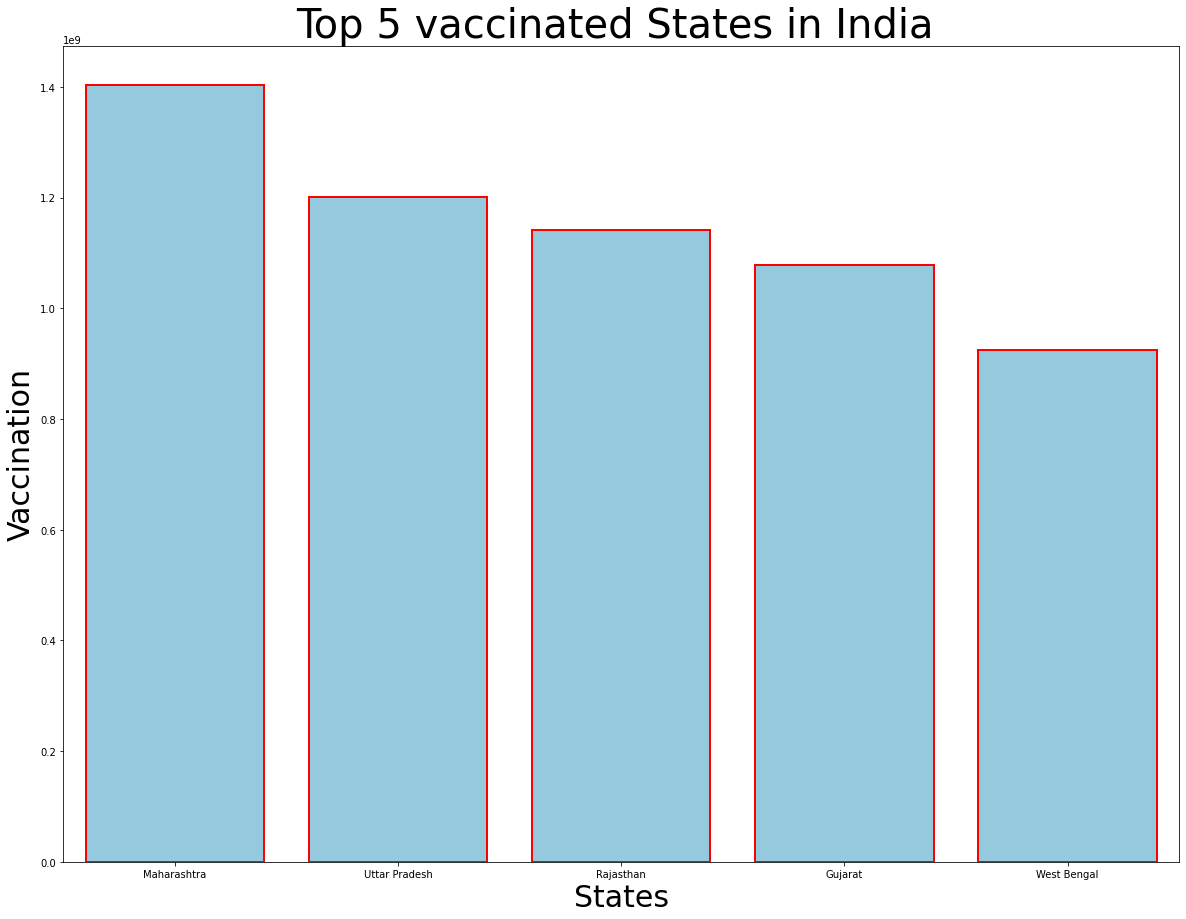

In [82]:
fig=plt.figure(figsize=(20,15))
plt.title('Top 5 vaccinated States in India ',fontsize=40)
ax=sns.barplot(data=max_vac,y='Total',x='State',linewidth=2,edgecolor='red',color='skyblue')
plt.xlabel('States',fontsize=30)
plt.ylabel('Vaccination',fontsize=30)
plt.show()

In [83]:
#least vaccinated state
min_vac = vaccine.groupby(['State'])['Total'].sum().to_frame('Total')
min_vac=min_vac.sort_values('Total',ascending=True)[:5]

min_vac

Total
State                                               
Lakshadweep                                2124715.0
Andaman and Nicobar Islands                8102125.0
Ladakh                                     9466289.0
Dadra and Nagar Haveli and Daman and Diu  11358600.0
Sikkim                                    16136752.0

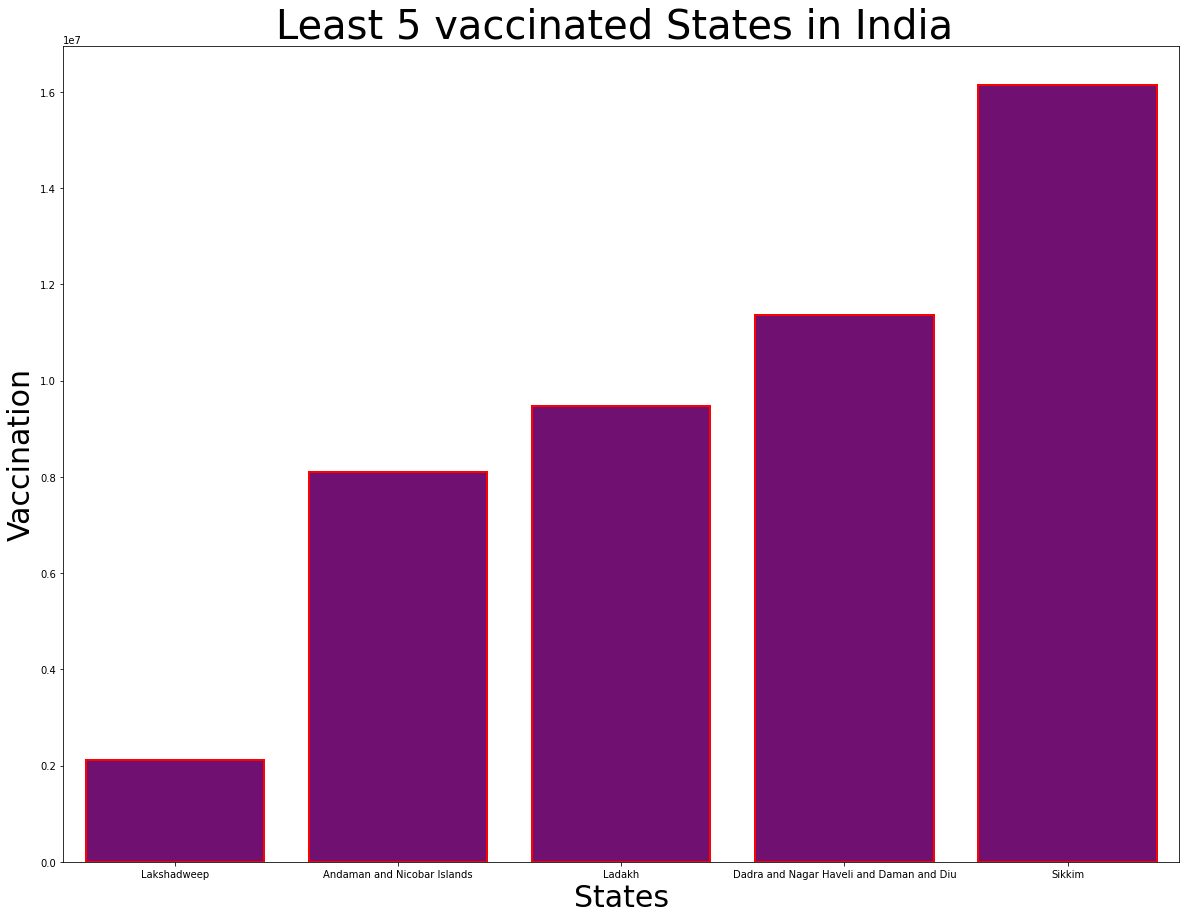

In [85]:
fig=plt.figure(figsize=(20,15))
plt.title('Least 5 vaccinated States in India ',fontsize=40)
ax=sns.barplot(data=min_vac,y='Total',x='State',linewidth=2,edgecolor='red',color='purple')
plt.xlabel('States',fontsize=30)
plt.ylabel('Vaccination',fontsize=30)
plt.show()

# Conclusion

### Maharashtra exhibited a significant surge in COVID-19 cases, fatalities, and recoveries from March to September. Moreover, males received a higher vaccination rate compared to females during this period,while Lakshadweep recorded a lower vaccination rate.